In [3]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

In [4]:
start=datetime.datetime(2020,1,1)
end=datetime.datetime(2020,4,17)


In [5]:
google=web.DataReader('GOOGL','yahoo',start,end)

In [6]:
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,1340.660034,1332.130005,1335.790039,1339.390015,975700,1339.390015
2020-01-02,1368.680054,1346.489990,1348.410034,1368.680054,1363900,1368.680054
2020-01-03,1373.750000,1347.319946,1348.000000,1361.520020,1170400,1361.520020
2020-01-06,1398.319946,1351.000000,1351.630005,1397.810059,2338400,1397.810059
2020-01-07,1403.500000,1391.560059,1400.459961,1395.109985,1716500,1395.109985
...,...,...,...,...,...,...
2020-04-13,1214.520020,1182.329956,1201.500000,1210.410034,1935100,1210.410034
2020-04-14,1275.750000,1228.540039,1239.969971,1265.229980,3167900,1265.229980
2020-04-15,1275.109985,1234.000000,1246.510010,1257.300049,2111800,1257.300049


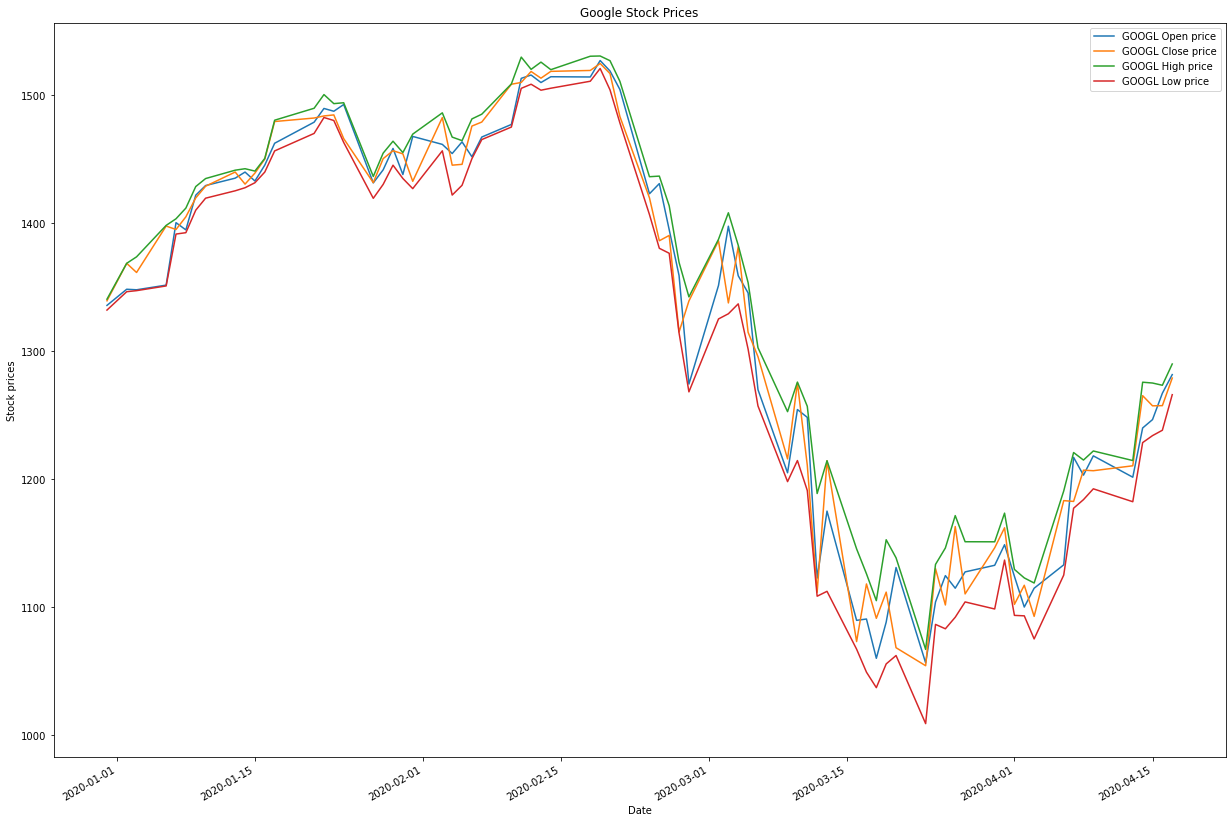

In [7]:
google['Open'].plot(label='GOOGL Open price',figsize=(21,15))
google['Close'].plot(label='GOOGL Close price')
google['High'].plot(label='GOOGL High price')
google['Low'].plot(label='GOOGL Low price')
plt.legend()
plt.title('Google Stock Prices')
plt.ylabel('Stock prices')
plt.show()

Text(0.5, 1.0, 'Volume traded')

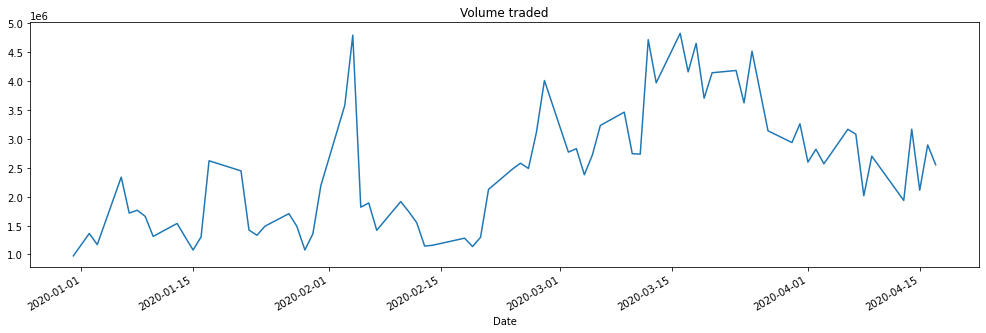

In [8]:
google['Volume'].plot(figsize=(17,5))
plt.title('Volume traded')

In [9]:
import numpy as np
%matplotlib inline

In [10]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)
tesla=web.DataReader('TSLA','yahoo',start,end)
ford=web.DataReader('F','yahoo',start,end)
gm=web.DataReader('GM','yahoo',start,end)

In [11]:
tesla.to_csv('Tesla_Stock.csv')
ford.to_csv('Ford_stock.csv')
gm.to_csv('Gm_stock.csv')

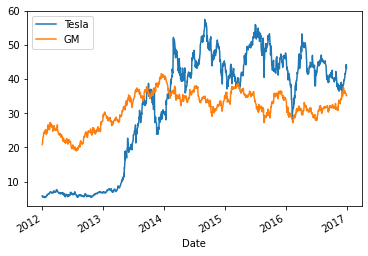

In [12]:
tesla['Open'].plot(label='Tesla')
gm['Open'].plot(label='GM')
plt.legend()

In [13]:
#Market Cap
tesla['Total Traded']=tesla['Open']*tesla['Volume']
ford['Total Traded']=ford['Open']*ford['Volume']
gm['Total Traded']=gm['Open']*gm['Volume']

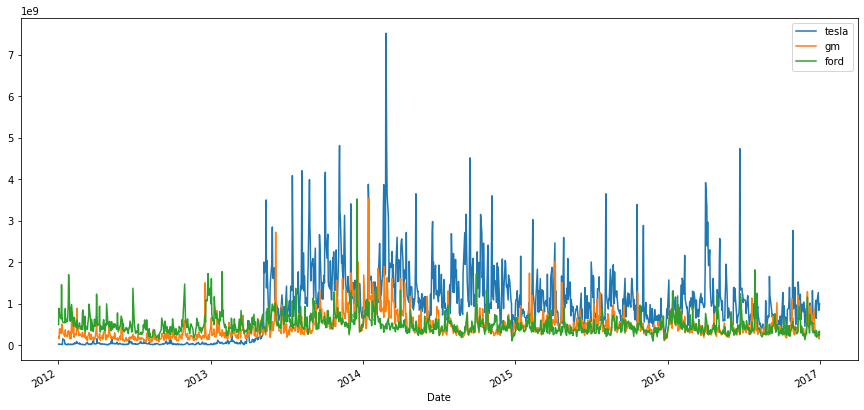

In [14]:
tesla['Total Traded'].plot(label='tesla',figsize=(15,7))
gm['Total Traded'].plot(label='gm',figsize=(15,7))
ford['Total Traded'].plot(label='ford',figsize=(15,7))
plt.legend()

In [15]:
tesla['Total Traded'].argmax() #หาตํ่าเเหน่งที่มากสุด

538

In [16]:
tesla.iloc[(538)]

High            5.184000e+01
Low             4.569000e+01
Open            4.600000e+01
Close           4.960000e+01
Volume          1.634085e+08
Adj Close       4.960000e+01
Total Traded    7.516791e+09
Name: 2014-02-25 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

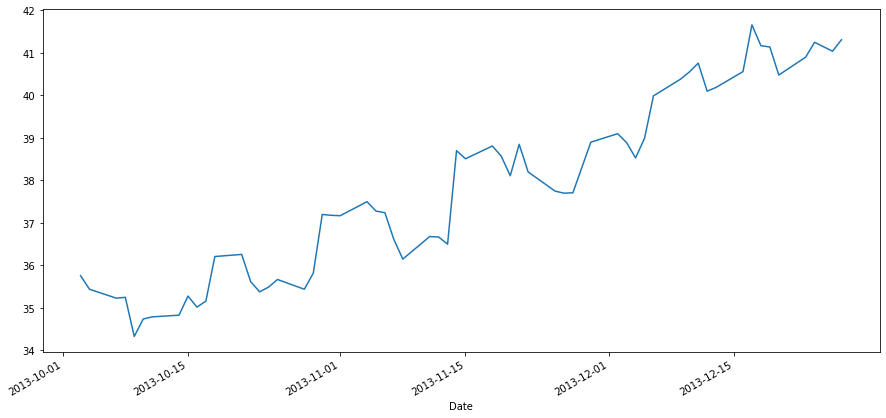

In [17]:
gm['Open'].iloc[440:500].plot(figsize=(15,7))

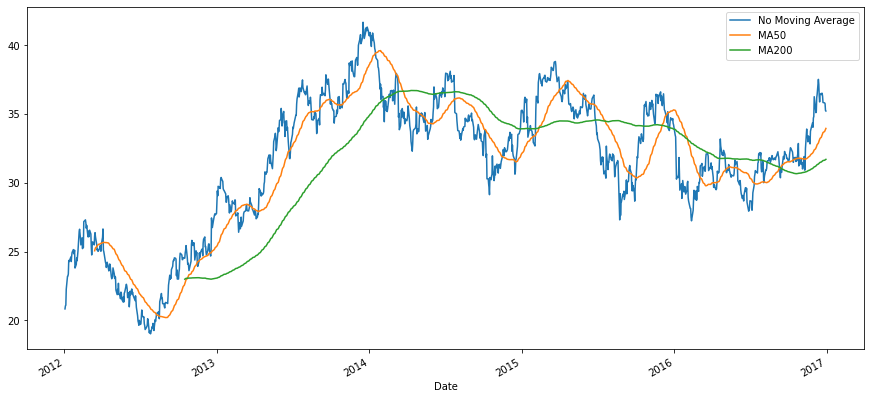

In [18]:
gm['Open'].plot(label='No Moving Average',figsize=(15,7))
gm['MA50']=gm['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')
gm['MA200']=gm['Open'].rolling(200).mean()
gm['MA200'].plot(label='MA200')
plt.legend()

In [19]:
from pandas.plotting import scatter_matrix
import pandas as pd

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

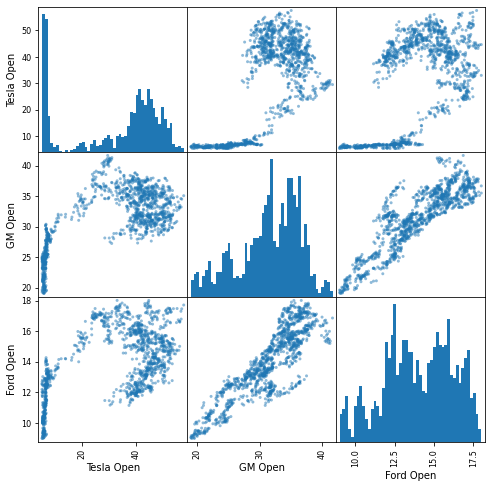

In [20]:
#Correlation and Scatter Matrix
car_comp=pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns=['Tesla Open','GM Open','Ford Open']
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50})

C:\Users\ASUS\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


([<matplotlib.lines.Line2D at 0x19a23c11220>,
  <matplotlib.patches.Rectangle at 0x19a23b1a100>])

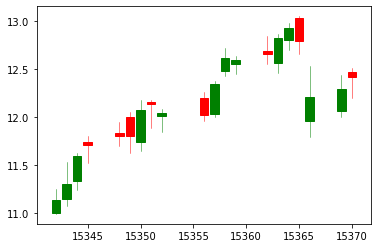

In [21]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

ford_reset=ford.loc['2012-01':'2012-01'].reset_index()
ford_reset['date_ax']=ford_reset['Date'].apply(lambda date: date2num(date))
ford_values=[tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']].values]

mondays=WeekdayLocator(MONDAY)
alldays=DayLocator()
weekFormatter=DateFormatter('%b %d')
dayFormatter=DateFormatter('%d')

fig,ax=plt.subplots()
candlestick_ohlc(ax,ford_values,width=0.8,colorup='g',colordown='r')

# Daily Percentage Change

## rt=[pt/p(t-1)] -1

In [22]:
tesla['returns']=(tesla['Close']/tesla['Close'].shift(1))-1
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


In [23]:
gm['returns']=(gm['Close']/gm['Close'].shift(1))-1
ford['returns']=(ford['Close']/ford['Close'].shift(1))-1
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269413,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346701,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135050,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714724,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652891,2.803604e+08,NaN,NaN,-0.003490


<AxesSubplot:>

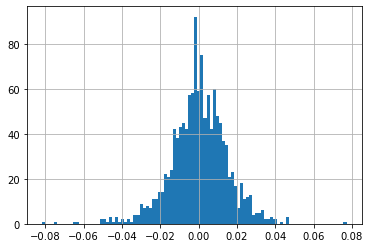

In [24]:
ford['returns'].hist(bins=100)

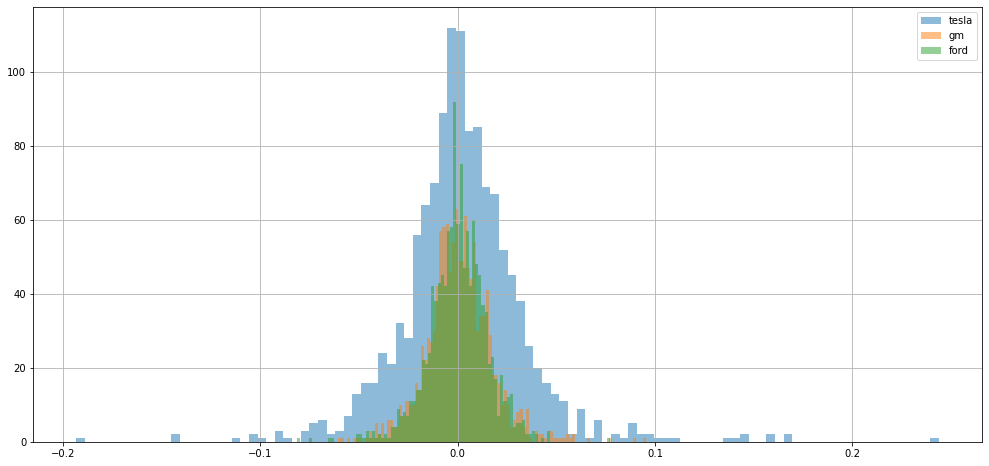

In [29]:
tesla['returns'].hist(bins=100,label='tesla',alpha=0.5,figsize=(17,8))
gm['returns'].hist(bins=100,label='gm',alpha=0.5)
ford['returns'].hist(bins=100,label='ford',alpha=0.5)
plt.legend()

In [26]:
tesla

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500,5.616000,2.685921e+07,NaN
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500,5.542000,1.777512e+07,-0.013177
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500,5.424000,2.791268e+07,-0.021292
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500,5.382000,2.682736e+07,-0.007743
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000,5.450000,2.421900e+07,0.012635
...,...,...,...,...,...,...,...,...
2016-12-23,42.689999,41.542000,41.599998,42.667999,23352500,42.667999,9.714640e+08,0.023459
2016-12-27,44.450001,42.883999,42.976002,43.905998,29578500,43.905998,1.271166e+09,0.029015
2016-12-28,44.759998,43.439999,44.306000,43.948002,18912500,43.948002,8.379372e+08,0.000957


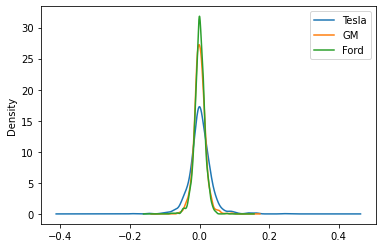

In [30]:
tesla['returns'].plot(kind='kde',label='Tesla')#kernal density estimation= curve best fit
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

In [32]:
tesla['returns']

Date
2012-01-03         NaN
2012-01-04   -0.013177
2012-01-05   -0.021292
2012-01-06   -0.007743
2012-01-09    0.012635
                ...   
2016-12-23    0.023459
2016-12-27    0.029015
2016-12-28    0.000957
2016-12-29   -0.023027
2016-12-30   -0.004612
Name: returns, Length: 1258, dtype: float64

<AxesSubplot:>

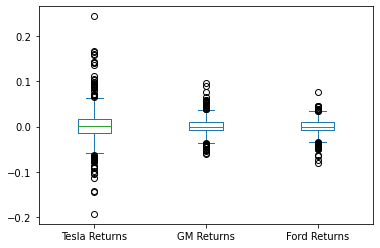

In [33]:
box_df=pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns=['Tesla Returns','GM Returns','Ford Returns']
box_df.plot(kind='box')

array([[<AxesSubplot:xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='GM Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Tesla Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='GM Returns'>,
        <AxesSubplot:xlabel='GM Returns', ylabel='GM Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='GM Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='GM Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Ford Returns'>]],
      dtype=object)

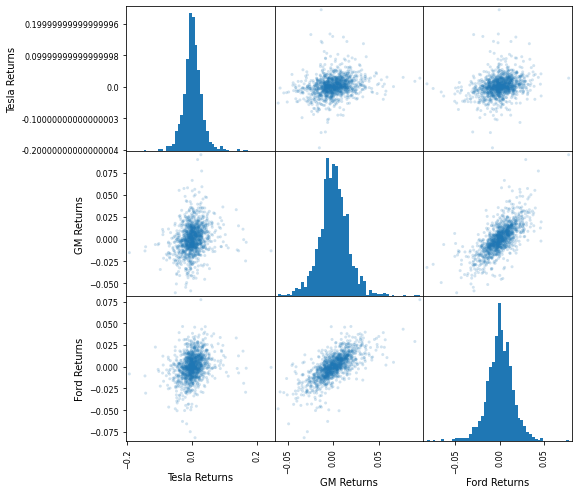

In [37]:
# scatter_matrix เอาไว้ดู correlation ระหว่างกัน
scatter_matrix(box_df,figsize=(8,8),hist_kwds={'bins':50},alpha=0.2)

# Cumulative Return
## it=(1+r)i(t-1)

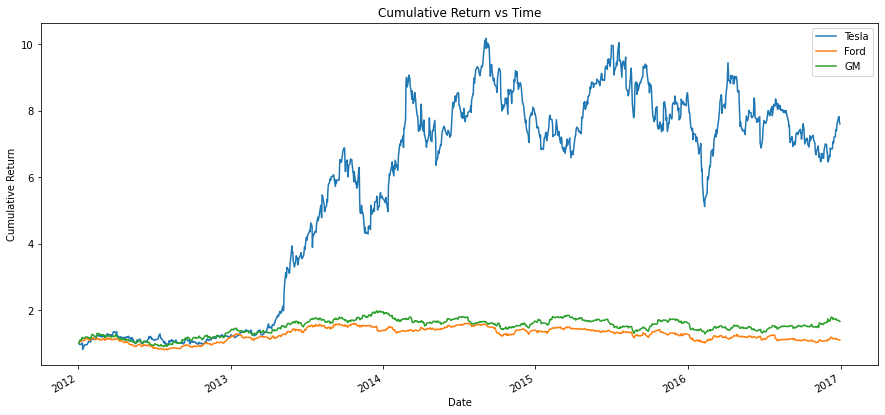

In [41]:
tesla['Cumulative Return']=(1+tesla['returns']).cumprod().plot(label='Tesla',figsize=(15,7))
ford['Cumulative Return']=(1+ford['returns']).cumprod().plot(label='Ford')
gm['Cumulative Return']=(1+gm['returns']).cumprod().plot(label='GM')
plt.title('Cumulative Return vs Time')
plt.ylabel('Cumulative Return')
plt.legend()